In [ ]:
# CONNECT GOOGLE DRIVE
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !unzip "/content/drive/My Drive/dataset/NEU-CLS-64_data.zip" -d "/content/drive/My Drive/dataset/defect4/"

unzip:  cannot find or open /content/drive/My Drive/dataset/NEU-CLS-64_data.zip, /content/drive/My Drive/dataset/NEU-CLS-64_data.zip.zip or /content/drive/My Drive/dataset/NEU-CLS-64_data.zip.ZIP.


In [31]:
# IMPORT LIBRARY
import pandas as pd
import cv2
import numpy as np
import os
import re
import glob

In [32]:
# READ IMAGE
path = os.path.abspath('defect.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir(path+'NEU-CLS-64/') #list directory in Land Use Images folder
label = 0 #label dari data
im_arr = [] #array untuk gambar
lb_arr = [] #array untuk label
X = [] #array untuk X
y = [] #array untuk y
for i in dirs: #loop all directory
    count = 0 #count data
    for pic in glob.glob(path+'NEU-CLS-64/'+i+'/*.jpg'): #loop jpg difolder
        im = cv2.imread(pic) #open image pakai opencv
        im = cv2.resize(im,(32,32)) #resize gambar ke 32 x 32
        im = np.array(im) #change into array 
        count = count + 1 #count data + 1
        X.append(im) #masukan gambar yg sudah dibaca kedalam X
        y.append(label) #masukan label yang sudah dibaca kedalam y
        if(count == 3): #SAmple data no.3 tampilkan nanti di plot
            im_arr.append({str(i):im}) #sample data no.3 tampilkan
    print("Jumlah "+str(i)+" : "+str(count)) #print jumlah data
    label = label + 1 #label saat ini + 1
    lb_arr.append(i) #labelarray
X = np.array(X)
y = np.array(y);

Jumlah cr : 1210
Jumlah gg : 296
Jumlah in : 775
Jumlah pa : 1148
Jumlah ps : 797
Jumlah rp : 200
Jumlah rs : 1589
Jumlah sc : 773
Jumlah sp : 438


In [34]:
import os
import re
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

from sklearn.metrics import confusion_matrix

In [35]:
path = os.path.abspath('defect.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir(path+'NEU-CLS-64') #list directory in Land Use Images folder
label = 0 #Label start from 0 
X = [] #Final Image Array Variable Store here
y = [] #Final Image label variable store here
example_data = []
example_label = []
for i in dirs: #loop all directory
    count = 0 #Temporary variable count
    for pic in glob.glob(path+'NEU-CLS-64/'+i+'/*.jpg'): #i = loop each directory, read all jpg
        im = cv2.imread(pic) #open image using OpenCV
        im = cv2.resize(im,(32,32)) #Resize size to 32 x 32
        im = np.array(im) #change image into array
        count = count + 1 #count image in directory
        X.append(im) #add image of array to X
        y.append(label) #add label into y
        if(count==3):
            example_data.append({str(i):im})
            example_label.append(i)
    print("Jumlah "+str(i)+" : "+str(count)) #Print jumlah dari image per class/label
    label = label + 1 #LABEL + 1 untuk menandakan sudah di folder lainnua
X = np.array(X) #jadikan numpy array
y = np.array(y); #jadikan numpy array

Jumlah cr : 1210
Jumlah gg : 296
Jumlah in : 775
Jumlah pa : 1148
Jumlah ps : 797
Jumlah rp : 200
Jumlah rs : 1589
Jumlah sc : 773
Jumlah sp : 438


In [37]:
mapping = {
    "rs":"Role in Scale",
    "pa":"Patches",
    "cr":"Crazing",
    "ps":"Pitt Surface",
    "in":"Inclusion",
    "sc":"Scratces",
    "sp":"Scratch Patches",
    "rp":"Role Patches",
    "gg":"Ground Ground"
}

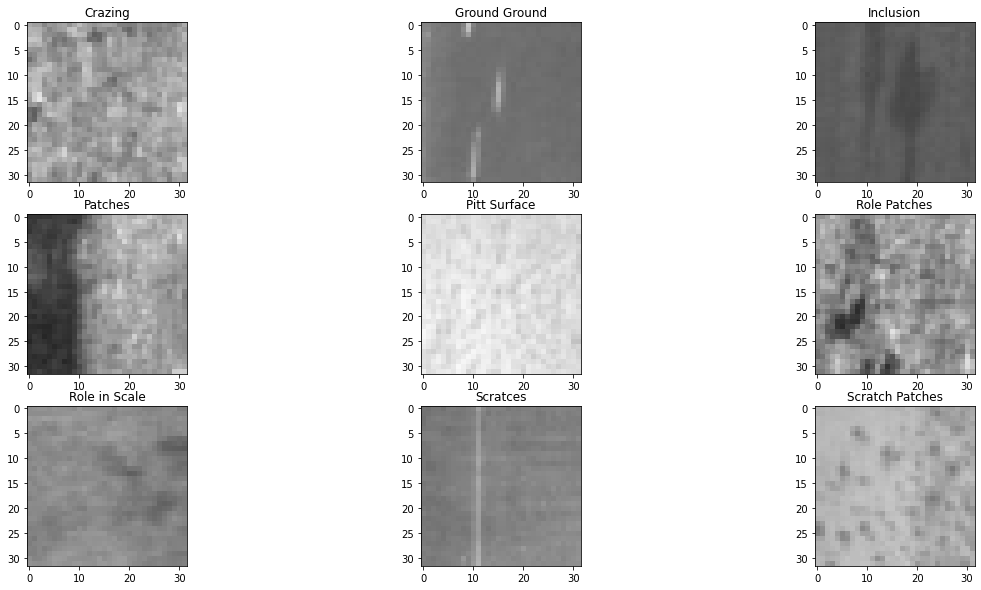

In [38]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
cnt = 0
row = 0
col = 0
for i in example_data:
    for key, value in i.items():
        if(cnt==3):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(mapping.get(key))
        cnt = cnt + 1
        col = col + 1
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 9) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 9) #change label to binary / categorical

In [40]:
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(9, activation='softmax')) #softmax works

In [41]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
152/152 [==============================] - 5s 27ms/step - loss: 1.9641 - accuracy: 0.2568 - val_loss: 1.8488 - val_accuracy: 0.2692
Epoch 2/25
152/152 [==============================] - 4s 24ms/step - loss: 1.7189 - accuracy: 0.4094 - val_loss: 1.5594 - val_accuracy: 0.4629
Epoch 3/25
152/152 [==============================] - 4s 25ms/step - loss: 1.5737 - accuracy: 0.4578 - val_loss: 1.4376 - val_accuracy: 0.4876
Epoch 4/25
152/152 [==============================] - 4s 24ms/step - loss: 1.4919 - accuracy: 0.4863 - val_loss: 1.3384 - val_accuracy: 0.5308
Epoch 5/25
152/152 [==============================] - 4s 25ms/step - loss: 1.2901 - accuracy: 0.5602 - val_loss: 1.1374 - val_accuracy: 0.5778
Epoch 6/25
152/152 [==============================] - 4s 23ms/step - loss: 1.1888 - accuracy: 0.5891 - val_loss: 1.0470 - val_accuracy: 0.6361
Epoch 7/25
152/152 [==============================] - 3s 23ms/step - loss: 1.0625 - accuracy: 0.6352 - val_loss: 0.8980 - val_accuracy: 0.6977

In [44]:
from keras.models import load_model

model = model.save('model.h5')
model_baru = load_model('model.h5')
y_pred = model_baru.predict_classes(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(classification_report(y_test_, y_pred, target_names=mapping.values()))

AttributeError: 'NoneType' object has no attribute 'save'

In [16]:
import keras

print("Keras version: " + keras.__version__)

Keras version: 2.8.0


In [20]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v2.version' from 'D:\\Application\\Anaconda\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [21]:
confusion_matrix(y_test_, y_pred)

NameError: name 'y_test_' is not defined

In [ ]:
model.save("/content/drive/My Drive/dataset/Defect/model.h5")